In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousingData.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace = True)

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [12]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [13]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.score(X_test, y_test)

0.6155131417309055

In [19]:
y_pred = model.predict(X_test)

In [20]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Variance':y_test-y_pred})
df1.head()

,Actual,Predicted,Variance
329,22.6,26.369034,-3.769034
371,50.0,22.587369,27.412631
219,23.0,29.090924,-6.090924
403,8.3,11.427114,-3.127114
78,21.2,21.559072,-0.359072


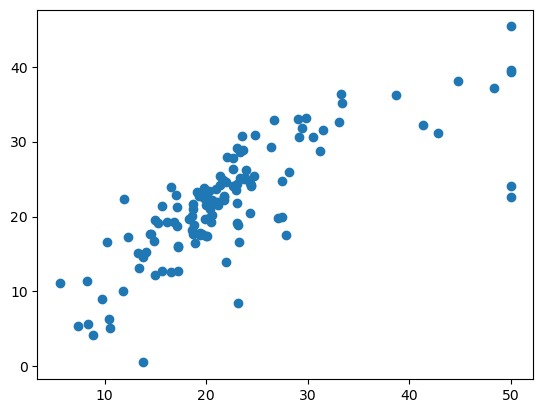

In [21]:
plt.scatter(y_test, y_pred)
plt.show()

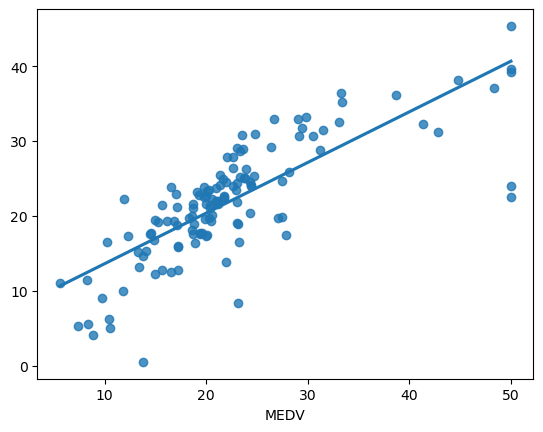

In [22]:
sns.regplot(x = y_test, ci = None, y = y_pred);

In [23]:
model.intercept_

34.23023777914397

In [24]:
coeff = model.coef_
coeff


array([-1.23997987e-01,  3.59128081e-02, -8.26696076e-02,  2.84028272e+00,
       -1.40471591e+01,  4.10947630e+00, -2.52084596e-02, -1.46689524e+00,
        1.92396293e-01, -8.66432294e-03, -9.60163368e-01,  8.68086606e-03,
       -4.27805589e-01])

In [25]:
coeff_df = pd.DataFrame()
coeff_df['Column name'] = X.columns
coeff_df['Coefficient'] = coeff
coeff_df

,Column name,Coefficient
0,CRIM,-0.123998
1,ZN,0.035913
2,INDUS,-0.082670
3,CHAS,2.840283
4,NOX,-14.047159
5,RM,4.109476
6,AGE,-0.025208
7,DIS,-1.466895
8,RAD,0.192396
9,TAX,-0.008664


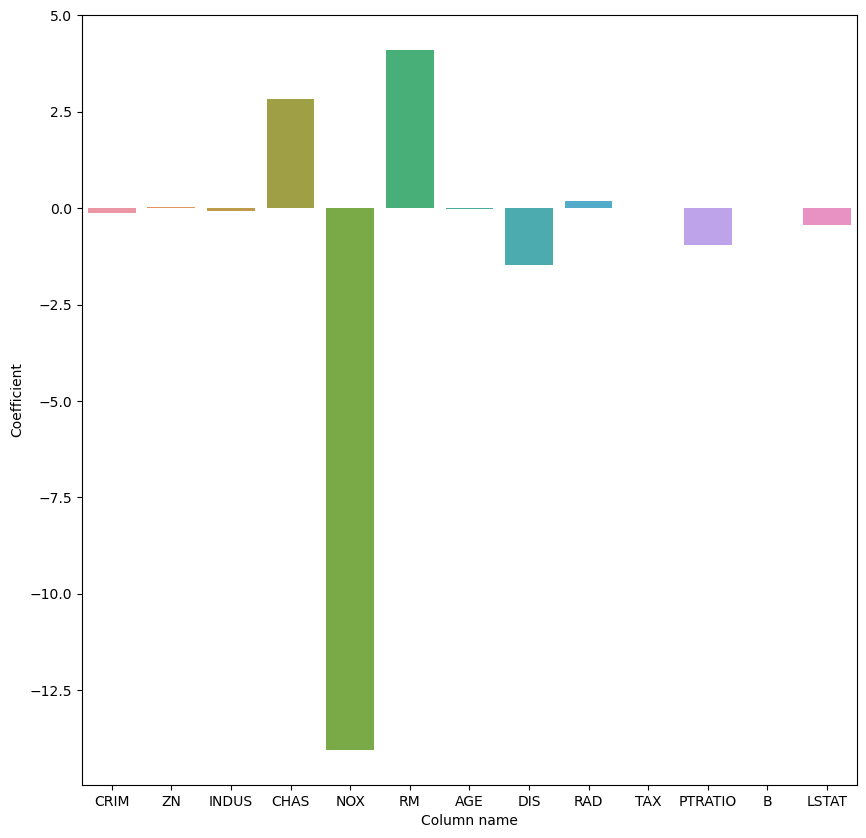

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Column name", y="Coefficient", data = coeff_df)
plt.show()

In [27]:
from sklearn import metrics

In [28]:
print('Mean R2 score on test data of Linear Regression: ',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error on test data of Linear Regression: ',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error on test data of Linear Regression: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error on test data of Linear Regression: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean R2 score on test data of Linear Regression:  0.6155131417309055
Mean Absolute Error on test data of Linear Regression:  3.815202463840308
Mean Squared Error on test data of Linear Regression:  31.412197769446735
Root Mean Squared Error on test data of Linear Regression:  5.604658577419925
